In [12]:
import pandas as pd
from glob import glob
import os.path
from matplotlib import pyplot

In [50]:
def load_acc_info(acc, src='swine'):
    d = {}
    d['acc'] = acc
    d['source'] = src

    all_gather = pd.read_csv(f'outputs.swine-x-all/{acc}.gather.csv')
    all_gathertax = pd.read_csv(f'outputs.swine-x-all/{acc}.gathertax.summarized.csv')
    all_gathertax_species = all_gathertax[all_gathertax['rank'] == 'species']
    d['all_num_genomes'] = len(all_gather)
    d['all_num_species'] = len(all_gathertax_species)

    reps_gather = pd.read_csv(f'outputs.swine-x-reps/{acc}.gather.csv')
    reps_gathertax = pd.read_csv(f'outputs.swine-x-reps/{acc}.gathertax.summarized.csv')
    reps_gathertax_species = reps_gathertax[reps_gathertax['rank'] == 'species']
    d['reps_num_genomes'] = len(reps_gather)
    d['reps_num_species'] = len(reps_gathertax_species)

    weighted_found = int(all_gather['sum_weighted_found'].tail(1))
    weighted_total = int(all_gather['total_weighted_hashes'].tail(1))

    d['p_weighted_found'] = 100*weighted_found / weighted_total
    
    try:
        host_df = pd.read_csv(f'outputs.swine-x-all/{acc}.x.host.search.csv')
        p_host = float(host_df['similarity'].tail(1)) * 100
    except pd.errors.EmptyDataError:
        p_host = 0
    d['p_host'] = p_host
    
    return d

In [51]:
acclist = glob('outputs.swine-x-all/*.gather.csv')
acclist = [ os.path.basename(x) for x in acclist ]
acclist = [ x.split('.')[0] for x in acclist ]

print(len(acclist))

81


In [52]:
acc_info_list = [ load_acc_info(acc) for acc in acclist ]

gather_info_df = pd.DataFrame(acc_info_list)

In [53]:
gather_info_df

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,SRR17241533,swine,1312,975,1003,1004,65.320447,0.000000
1,SRR11124666,swine,464,356,381,382,74.930494,0.000000
2,SRR11125165,swine,483,389,396,397,66.625108,0.000000
3,SRR14369150,swine,421,314,338,339,74.213846,23.349882
4,SRR11126074,swine,522,405,424,425,60.929624,0.000000
...,...,...,...,...,...,...,...,...
76,SRR11124817,swine,528,443,453,454,63.049019,0.000000
77,SRR5008264,swine,470,370,370,371,50.763239,0.000000
78,SRR11183496,swine,261,211,210,211,61.317847,0.000000
79,SRR11489788,swine,1394,933,1034,1035,68.777322,0.000000


{'bodies': [<matplotlib.collections.PolyCollection at 0x169de4c70>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x169de4b20>,
 'cmins': <matplotlib.collections.LineCollection at 0x169dfd310>,
 'cbars': <matplotlib.collections.LineCollection at 0x169dfd6d0>}

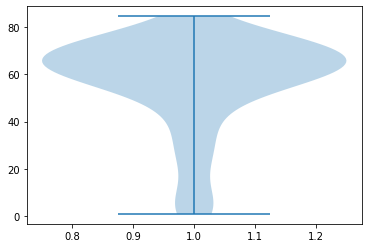

In [46]:
pyplot.violinplot(gather_info_df['p_weighted_found'])

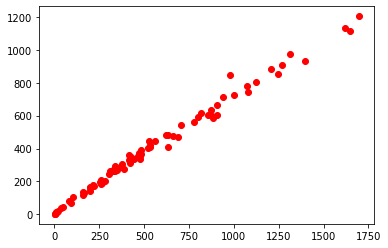

In [47]:
pyplot.plot(gather_info_df['all_num_genomes'], gather_info_df['all_num_species'], 'ro')

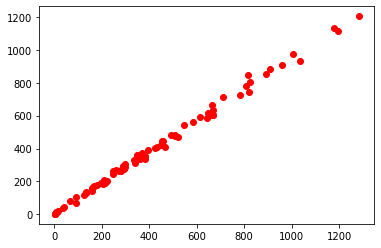

In [48]:
pyplot.plot(gather_info_df['reps_num_species'], gather_info_df['all_num_species'], 'ro')

{'bodies': [<matplotlib.collections.PolyCollection at 0x169727340>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1697278e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1697578b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1697573d0>}

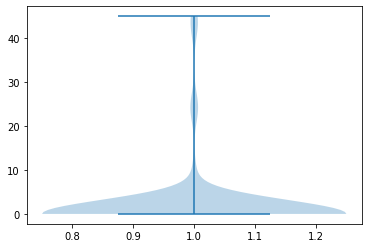

In [54]:
pyplot.violinplot(gather_info_df['p_host'])

In [55]:
gather_info_df.sort_values(by='p_host')

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,SRR17241533,swine,1312,975,1003,1004,65.320447,0.000000
57,ERR3211947,swine,1271,910,958,959,58.063968,0.000000
56,SRR11126381,swine,444,338,359,360,68.316184,0.000000
55,SRR7182028,swine,619,481,493,494,56.466795,0.000000
54,SRR14126932,swine,1,2,1,2,0.946113,0.000000
...,...,...,...,...,...,...,...,...
21,SRR9720085,swine,976,845,815,816,39.333773,8.960834
3,SRR14369150,swine,421,314,338,339,74.213846,23.349882
12,SRR17241527,swine,883,585,643,644,77.456073,25.103062
22,SRR19906118,swine,309,263,248,249,43.481131,42.267117
